In [2]:
#Lets bring in Boston House Price dataset into python environment as we want to 
#look into a numeric target variable as in our smaple data set which is provided 

#CRIM: per capita crime rate by town
#ZN : proportion of residential land zoned ....
#CHAS : categorical variable to differentiate closeness to Charles River
#NOX: numeric nitric oxides concentration...
#Target : MEDV - Median value of owner-occupied homes in $1000s

#Load all the libraries required for the project
import numpy
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error


C:\Users\hb65402\ANACONDA_HOME\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [7]:
#Load the data from csv file
filename = 'housing.csv'
names =['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
#CRIM: Per capita crime rate by town
#ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
#INDUS: Proportion of non-retail business acres per town
#CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#NOX: Nitric oxide concentration (parts per 10 million)
#RM: Average number of rooms per dwelling
#AGE: Proportion of owner-occupied units built prior to 1940
#DIS: Weighted distances to five Boston employment centers
#RAD: Index of accessibility to radial highways
#TAX: Full-value property tax rate per $10,000
#PTRATIO: Pupil-teacher ratio by town
#B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
#LSTAT: Percentage of lower status of the population
#MEDV: Median value of owner-occupied homes in $1000s

data = read_csv(filename,delim_whitespace = True,names=names)
# attributes are seperated by white spaces and not commas
print(data.shape)
print(data.dtypes)
print(data.head(20))

(506, 14)
CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object
        CRIM    ZN  INDUS  CHAS   NOX    RM    AGE   DIS  RAD    TAX  PTRATIO  \
0   6.32e-03  18.0   2.31     0  0.54  6.58   65.2  4.09    1  296.0     15.3   
1   2.73e-02   0.0   7.07     0  0.47  6.42   78.9  4.97    2  242.0     17.8   
2   2.73e-02   0.0   7.07     0  0.47  7.18   61.1  4.97    2  242.0     17.8   
3   3.24e-02   0.0   2.18     0  0.46  7.00   45.8  6.06    3  222.0     18.7   
4   6.91e-02   0.0   2.18     0  0.46  7.15   54.2  6.06    3  222.0     18.7   
5   2.99e-02   0.0   2.18     0  0.46  6.43   58.7  6.06    3  222.0     18.7   
6   8.83e-02  12.5   7.87     0  0.52  6.01   66.6  5.56    5  311.0     15.2   
7   1.45e-01  12.5   7.87     0  0.52  6.17   96.1  5.95    5 

In [4]:
#Lets summarize the distribution of each attribute
set_option('precision',1)
print(data.describe())
##Seems the values are ranging between different values and so scaling should be able to get
#better results 

          CRIM     ZN  INDUS     CHAS    NOX     RM    AGE    DIS    RAD  \
count  5.1e+02  506.0  506.0  5.1e+02  506.0  506.0  506.0  506.0  506.0   
mean   3.6e+00   11.4   11.1  6.9e-02    0.6    6.3   68.6    3.8    9.5   
std    8.6e+00   23.3    6.9  2.5e-01    0.1    0.7   28.1    2.1    8.7   
min    6.3e-03    0.0    0.5  0.0e+00    0.4    3.6    2.9    1.1    1.0   
25%    8.2e-02    0.0    5.2  0.0e+00    0.4    5.9   45.0    2.1    4.0   
50%    2.6e-01    0.0    9.7  0.0e+00    0.5    6.2   77.5    3.2    5.0   
75%    3.7e+00   12.5   18.1  0.0e+00    0.6    6.6   94.1    5.2   24.0   
max    8.9e+01  100.0   27.7  1.0e+00    0.9    8.8  100.0   12.1   24.0   

         TAX  PTRATIO      B  LSTAT   MEDV  
count  506.0    506.0  506.0  506.0  506.0  
mean   408.2     18.5  356.7   12.7   22.5  
std    168.5      2.2   91.3    7.1    9.2  
min    187.0     12.6    0.3    1.7    5.0  
25%    279.0     17.4  375.4    6.9   17.0  
50%    330.0     19.1  391.4   11.4   21.2  


In [8]:
#Lets look at the correlation of the variables
set_option('precision',2)
print(data.corr(method='pearson'))


         CRIM    ZN  INDUS      CHAS   NOX    RM   AGE   DIS       RAD   TAX  \
CRIM     1.00 -0.20   0.41 -5.59e-02  0.42 -0.22  0.35 -0.38  6.26e-01  0.58   
ZN      -0.20  1.00  -0.53 -4.27e-02 -0.52  0.31 -0.57  0.66 -3.12e-01 -0.31   
INDUS    0.41 -0.53   1.00  6.29e-02  0.76 -0.39  0.64 -0.71  5.95e-01  0.72   
CHAS    -0.06 -0.04   0.06  1.00e+00  0.09  0.09  0.09 -0.10 -7.37e-03 -0.04   
NOX      0.42 -0.52   0.76  9.12e-02  1.00 -0.30  0.73 -0.77  6.11e-01  0.67   
RM      -0.22  0.31  -0.39  9.13e-02 -0.30  1.00 -0.24  0.21 -2.10e-01 -0.29   
AGE      0.35 -0.57   0.64  8.65e-02  0.73 -0.24  1.00 -0.75  4.56e-01  0.51   
DIS     -0.38  0.66  -0.71 -9.92e-02 -0.77  0.21 -0.75  1.00 -4.95e-01 -0.53   
RAD      0.63 -0.31   0.60 -7.37e-03  0.61 -0.21  0.46 -0.49  1.00e+00  0.91   
TAX      0.58 -0.31   0.72 -3.56e-02  0.67 -0.29  0.51 -0.53  9.10e-01  1.00   
PTRATIO  0.29 -0.39   0.38 -1.22e-01  0.19 -0.36  0.26 -0.23  4.65e-01  0.46   
B       -0.39  0.18  -0.36  4.88e-02 -0.

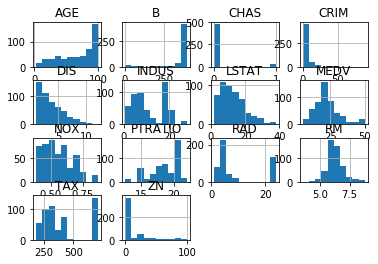

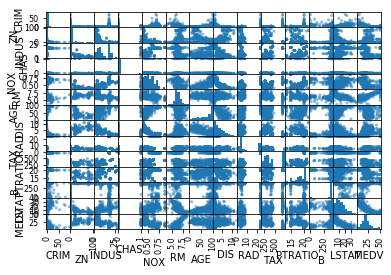

In [9]:
#Data Visualizations
#histograms
data.hist()
pyplot.show()
# scatter plot matrix
scatter_matrix(data)
pyplot.show()
#Some of them have explonential and some have bimodal representaions

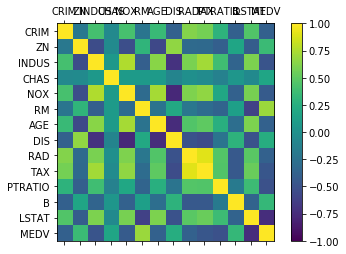

In [10]:
#Lets visualize correlations between attributes
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(data.corr(),vmin = -1,vmax =1,interpolation='none')
fig.colorbar(cax)
ticks = numpy.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
pyplot.show()

In [11]:
#We completed the exploratory phase now. The next one is to first divide
# the data into train and test data sets

array = data.values
X = array[:,0:13]
Y = array[:,13]
test_size = 0.20
seed =7
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=test_size,random_state=seed)

In [12]:
#Lets define the cross validation metrics for defining the train and test data
#Lets use 10-fold validation and RMSE as the scoring parameter
num_folds = 10
seed =7
scoring = 'neg_mean_squared_error'

In [13]:
#Lets try different algorithms and see how it performs..
#Linear regression - relationship between dependent and independent variables using a 
#straight line
#When multicollinearity is an issue we go for regularizations which basically adds bias and 
#at the same time increases variance. Adding bias means we might leave out some variables 
#Ridge regression has less variables at the end
#LASSO keeps all the coeficients of the variables non-zero
#Elastic Net is a combination of the above two regularizations
#Classification and Regression Trees
#Support Vector Regression
#K-Nearest Neighbors (KNN)

models =[]
models.append(('LR',LinearRegression()))
models.append(('LASSO',Lasso()))
models.append(('EN',ElasticNet()))
models.append(('KNN',KNeighborsRegressor()))
models.append(('CART',DecisionTreeRegressor()))
models.append(('SVR',SVR()))

In [14]:
#Evaluate each model
results =[]
names=[]
for name, model in models:
    kfold = KFold(n_splits=num_folds,random_state = seed)
    cv_results = cross_val_score(model,X_train,Y_train,cv=kfold,scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s: %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(msg)

LR: -21.379856 (9.414264)
LASSO: -26.423561 (11.651110)
EN: -27.502259 (12.305022)
KNN: -41.896488 (13.901688)
CART: -27.970517 (14.709577)
SVR: -85.518342 (31.994798)


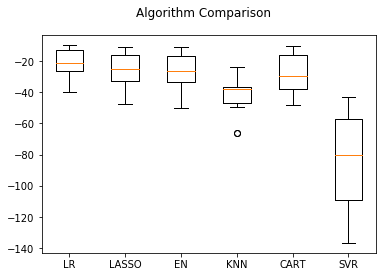

In [26]:
#Looking at the RMSE, we find LR seems to have lowest value and performing well along with CART.

#Lets take a look at the distribution of scores across all croos-validataion folds for each 
#algorithm

fig =pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

ScaledLR: -21.379856 (9.414264)
ScaledLASSO: -26.607314 (8.978761)
ScaledEN: -27.932372 (10.587490)
ScaledKNN: -20.107620 (12.376949)
ScaledCART: -25.008902 (10.026698)
ScaledSVR: -29.633086 (17.009186)


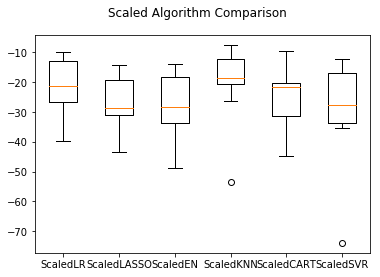

In [27]:
#Upto now, we did not do any standardization 
#Lets do the standardization using sklearn and perform these ML algorithms
# Standardize the dataset

pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))
results = []
names = []
for name, model in pipelines:
	kfold = KFold(n_splits=num_folds, random_state=seed)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()


In [28]:
#It is clear from the above graph that KNN has the tightest error bar and the lowerst score.
#Lets work on improving the results of KNN by tuning
#Default value of number of neighbors in KNN algorithm is 7
#Can we find this number by tuning the algorithem???
#We change the value from 1 to 21 with a 10-fold corss validation

# KNN Algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: -18.172137 using {'n_neighbors': 3}
-20.208663 (15.029652) with: {'n_neighbors': 1}
-18.172137 (12.950570) with: {'n_neighbors': 3}
-20.131163 (12.203697) with: {'n_neighbors': 5}
-20.575845 (12.345886) with: {'n_neighbors': 7}
-20.368264 (11.621738) with: {'n_neighbors': 9}
-21.009204 (11.610012) with: {'n_neighbors': 11}
-21.151809 (11.943318) with: {'n_neighbors': 13}
-21.557400 (11.536339) with: {'n_neighbors': 15}
-22.789938 (11.566861) with: {'n_neighbors': 17}
-23.871873 (11.340389) with: {'n_neighbors': 19}
-24.361362 (11.914786) with: {'n_neighbors': 21}


In [32]:
#So the above tuning gives us 3 to be the best value for nearest neighbors with the least RMSE
#There are ensemble methods to improve the performance of algorithms and tunings associated 
#with them..
#Some of the methods one could try are
#Boosting methods = AdaBoost and Gradient Boosting
#Bagging Methods = Random Forests (RF) and Extra Trees - Please read throuh them

#Now lets finalize a model with the results we got so far and apply it on the test set..

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = KNeighborsRegressor(n_neighbors=3)
model.fit(rescaledX, Y_train)

# transform the test dataset
rescaledTestX = scaler.transform(X_test)
predictions = model.predict(rescaledTestX)
print(mean_squared_error(Y_test, predictions))


33.187407407407406
